# Практика

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [3]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
cosine_rv = sts.cosine()
sample = cosine_rv.rvs(100)
sample

array([ 2.35688589,  0.802247  ,  0.86432726,  1.10071324,  0.68359369,
       -0.90503785, -1.53937212, -1.27576473,  0.82253905, -0.81936517,
       -0.11061285,  1.09114444,  0.07239701, -1.05169026,  1.27440737,
        1.89981983,  0.42646422, -0.02160711, -0.83968501, -0.22697   ,
        1.38653082, -1.90397232,  0.44725411,  1.15144451, -0.86115395,
       -1.78644085,  1.62093488, -0.47384478,  0.81307024, -0.52766898,
       -0.30669386,  0.43554467,  2.14918009, -0.77417015, -2.26865992,
       -0.5072718 , -0.39175584, -1.04800747, -0.82143038, -1.13624837,
        2.82102093, -1.5418144 ,  0.41350258, -1.53468021, -1.09346218,
        0.63817033, -1.67288315,  2.22733711,  0.55139195,  0.70665478,
        1.13842456, -0.29994879,  0.34702458,  0.61241579,  1.43484339,
        0.00371282,  0.92572441,  0.33129524,  1.41517992,  1.12181614,
        0.00933865,  0.36380516, -1.33399834,  0.13318186, -0.41348247,
        0.54139885, -0.91228092,  0.01086848, -1.04413973,  1.37

In [4]:
sample.dtype

dtype('float64')

In [5]:
real_mean = cosine_rv.mean() # настоящее среднее случайной величины

In [6]:
real_var = cosine_rv.var() # настоящая дисперсия случайной величины

### Постройте гистограмму выборки и теоретическую плотность распределения

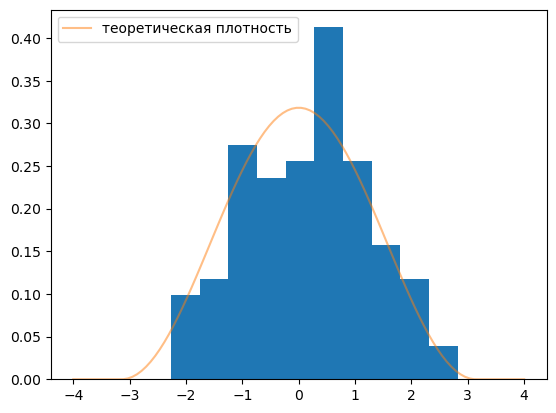

In [7]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = cosine_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [8]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.16807603799862889
1.2218889910991884


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

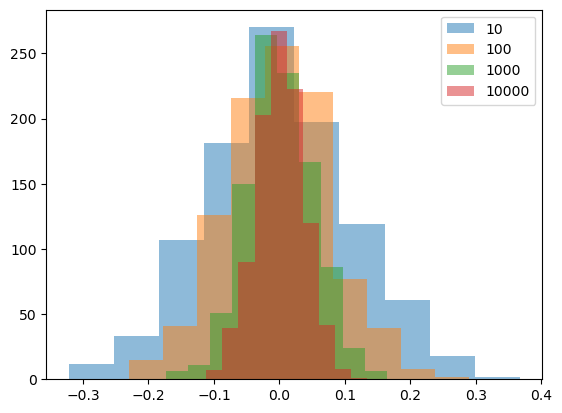

In [11]:
# ваш код тут
norm_rv = sts.norm(loc=cosine_rv.mean(), scale=cosine_rv.std() / np.sqrt(N))

# сгенерируем много выборочных средних
for N in [10, 20, 50, 100]:
  means = []
  for i in range(1000):
    means.append(np.mean(norm_rv.rvs(N)))
  plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

[]

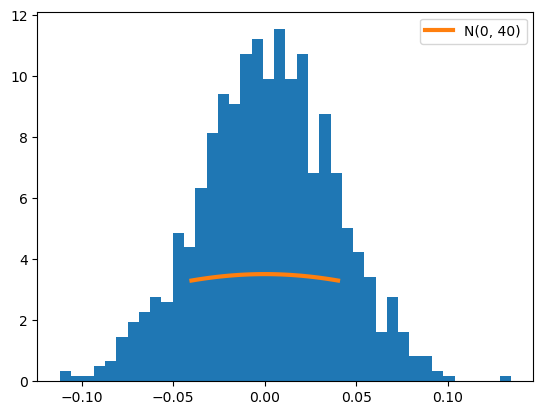

In [12]:
norm_rv = sts.norm(loc=cosine_rv.mean(), scale=cosine_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(-0.04,0.04, 100)
pdf = norm_rv.pdf(x)
plt.plot(x,norm_rv.pdf(x), linewidth=3, label='N(0, 40)')
plt.legend()
plt.plot()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**
##### Чем больше размер генерируемой выборки, тем точнее получаеся нормальная апрокмимация

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [13]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [14]:
a1_df = df[['total day calls', 'churn' ]]
a1_df

,total day calls,churn
0,110,False
1,123,False
2,114,False
3,71,False
4,113,False
...,...,...
3328,77,False
3329,57,False
3330,109,False
3331,105,False


In [15]:
#среднее значение по total day calls
means = a1_df.groupby('churn')['total day calls'].mean()
means

churn
False    100.283158
True     101.335404
Name: total day calls, dtype: float64

In [16]:
#дисперсия
var = a1_df.groupby('churn')['total day calls'].var(ddof=1)
var

churn
False    392.085817
True     465.795985
Name: total day calls, dtype: float64

In [17]:
import statsmodels.stats.weightstats as ssw
from statsmodels.stats.weightstats import _zconfint_generic

In [20]:
a2_df = df.loc[df["churn"]==True, "total day calls"]
a2_df

10      137
15       67
21       89
33      118
41       85
       ... 
3301    113
3304    114
3320    101
3322    105
3323    126
Name: total day calls, Length: 483, dtype: int64

In [21]:
data = a2_df
print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(data), 
                      scale=np.std(data, ddof=1)/np.sqrt(N-1)) # alternative 'two-sided' only
))

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по цпт интервальная оценка: (97.08403900959013, 105.58676844382603) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 


/tmp/ipykernel_4032/3305793974.py:3: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  sts.norm.interval(alpha=0.95, loc=np.mean(data),


In [22]:
a3_df = df.loc[df["churn"]==False, "total day calls"]
a3_df

0       110
1       123
2       114
3        71
4       113
       ... 
3328     77
3329     57
3330    109
3331    105
3332    113
Name: total day calls, Length: 2850, dtype: int64

In [25]:
data = a3_df
print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(data), 
                      scale=np.std(data, ddof=1)/np.sqrt(N-1)) # alternative 'two-sided' only
))

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по цпт интервальная оценка: (96.38265091038535, 104.18366487908834) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.04149114274125, 101.52482464673244) 


/tmp/ipykernel_4032/4241118543.py:3: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  sts.norm.interval(alpha=0.95, loc=np.mean(data),
